In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml

In [6]:
# dirs = [
#     "logs/minimal/version_23",  
#     "logs/minimal/version_24",  
# ]
target = "esrf"
# target = "adrf"

xaxis = "delta" if target == "esrf" else "t"

dirs = [
    "logs/minimal/version_5",  
    "logs/minimal/version_6",  
    "logs/minimal/version_7",  
]
results = {}
for d in dirs:
    with open(f"{d}/hparams.yaml", "r") as io:
        cfg = yaml.safe_load(io)
    df = pd.read_csv(f"{d}/{target}.csv")
    seed = cfg['seed']
    method = cfg["target"]
    results[method] = df

# concat all results
truth = results["es"][[xaxis, "truth"]]  # same for same seed


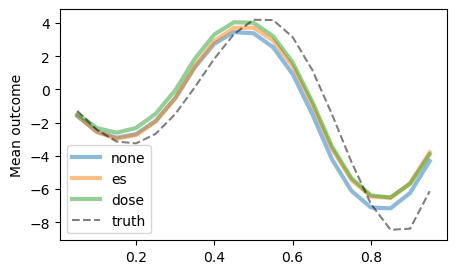

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))

for m, D in results.items():
    ax.plot(D[xaxis], D.estim, alpha=0.5, label=m, lw=3)

# add truth
ax.plot(truth[xaxis], truth.truth, c="black", alpha=0.5, ls="--", label="truth")
ax.legend(loc="lower left")
# ax.set_xlabel("Fraction of observed exposure")
ax.set_ylabel("Mean outcome")
plt.savefig(f"logs/minimal/plot_{seed}.pdf", bbox_inches="tight")
